In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


# Importing some basic libraries

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')

In [127]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,896.0,448.500000,258.797218,1.0,224.75,448.5,672.25,896.0
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [130]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Store_Area', ylabel='Density'>

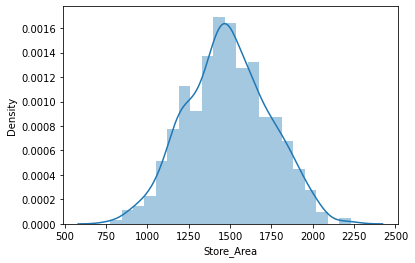

In [131]:
sns.distplot(df['Store_Area'])

<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

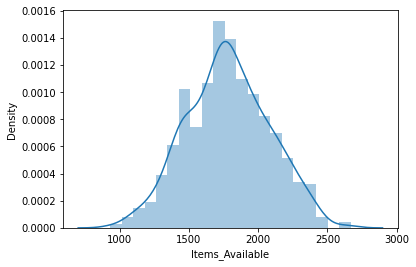

In [132]:
sns.distplot(df['Items_Available'])

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

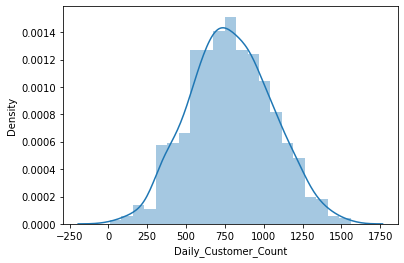

In [133]:
sns.distplot(df['Daily_Customer_Count'])

<AxesSubplot:xlabel='Store_Sales', ylabel='Density'>

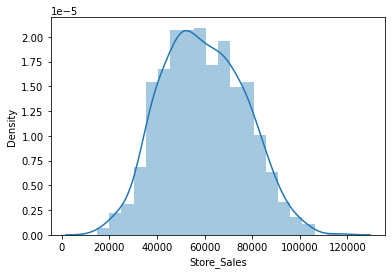

In [134]:
sns.distplot(df['Store_Sales'])

In [135]:
df[['Store_Area','Store_Sales']].sort_values('Store_Area',ascending=False)

,Store_Area,Store_Sales
466,2229,87410
540,2214,65900
91,2169,67080
849,2067,70230
398,2063,51480
...,...,...
72,891,67370
549,869,52540
744,854,77740
865,780,25600


In [137]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [138]:
df[['Store ID ','Store_Area']].sort_values('Store_Area',ascending=False).head(10)

,Store ID,Store_Area
466,467,2229
540,541,2214
91,92,2169
849,850,2067
398,399,2063
550,551,2049
628,629,2044
163,164,2044
567,568,2026
311,312,2019


Above is list of top 10 store id which has maximum store Area.

In [139]:
df[['Store ID ','Store_Sales']].sort_values('Store_Sales',ascending=False).head(10)

,Store ID,Store_Sales
649,650,116320
868,869,105150
432,433,102920
408,409,102310
758,759,101820
557,558,101780
866,867,100900
166,167,99570
692,693,99480
871,872,98260


Above is the list of top 10 store id which has maximum sales.

<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

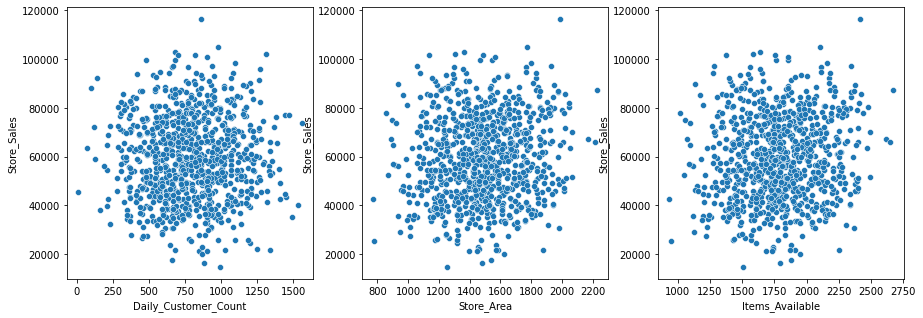

In [140]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x=df['Daily_Customer_Count'],y=df['Store_Sales'])
plt.subplot(1,3,2)
sns.scatterplot(x=df['Store_Area'],y=df['Store_Sales'])
plt.subplot(1,3,3)
sns.scatterplot(x=df['Items_Available'],y=df['Store_Sales'])


We can observe here that there is no such relationship observed.

In [144]:
highest_sales = pd.DataFrame(df.nlargest(5,['Store_Sales']))
highest_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820


A store which has 650 as a store Id has maximum sales with 1989 yard square store area , 2414 items available and 860 daily customers.

In [145]:
largest_store_area = pd.DataFrame(df.nlargest(5,['Store_Area']))
largest_store_area

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
466,467,2229,2667,660,87410
540,541,2214,2647,740,65900
91,92,2169,2617,600,67080
849,850,2067,2492,790,70230
398,399,2063,2493,810,51480


Store with 467 as store id has 2229 yard square largest store area,which has 2667 items available and 660 daily customer count.

In [146]:
highest_daily_customer = pd.DataFrame(df.nlargest(5,['Daily_Customer_Count']))
highest_daily_customer

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
848,849,919,1099,1560,73810
349,350,1886,2228,1530,40350
535,536,1057,1262,1490,35420
94,95,1921,2305,1470,77120
312,313,1494,1806,1450,43640


In [147]:
# Dropping store id column 
df.drop('Store ID ',axis=1,inplace=True)

In [150]:
# Getting Correlation matrix
correlation = df.corr()
correlation

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


<AxesSubplot:>

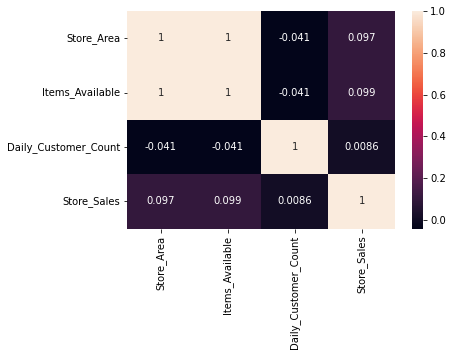

In [152]:
# plotting heatmap to understand better correlation
sns.heatmap(correlation,annot=True)

# Observation from above heatmap
1. Store Area and Items Available has a linear relationship.
2. Store Area and Items Available has more impact on store sales rather than daily customer count.

lets create a pairplot to see the relationship between the all features.

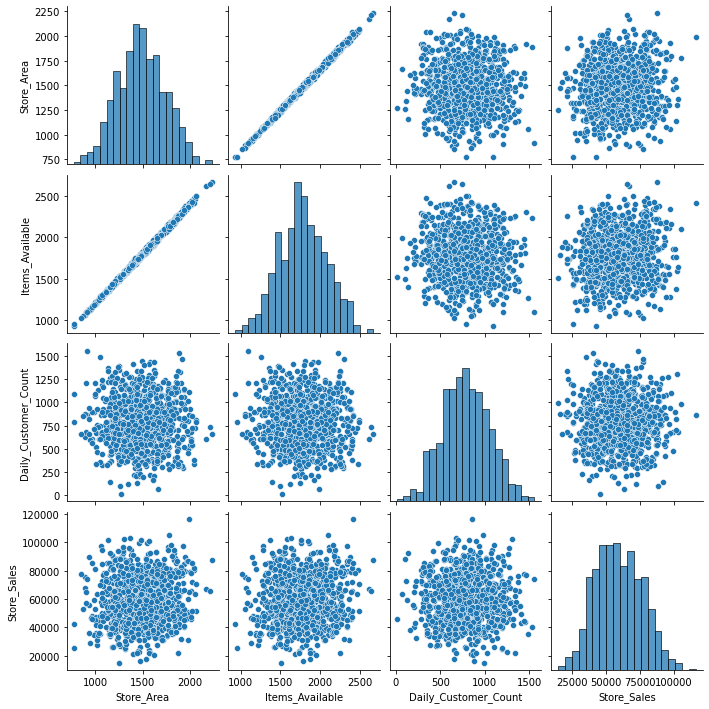

In [153]:
sns.pairplot(data=df)

We can see that the store area, items available, daily customer count amd store sales are almost normally distributed.